In [5]:
import torch
import sklearn.metrics
import math
from math import log2
import numpy as np
from scipy.stats import entropy
from scipy.stats import wasserstein_distance


# def KL(a, b):
#     a = np.asarray(a, dtype=np.float)
#     b = np.asarray(b, dtype=np.float)
#     return np.sum(np.where(a != 0, a * np.log(a / b), 0))

def total_variation(A, B):
    return 1/2* (sum(abs(a - b) for a, b in zip(A, B)))


m1 = "ResNet_Weights/Magnitude_Pruning.pt"
m2 = "ResNet_Weights/Magnitude_Pruning_Randomize_layerwise.pt"
m3 = "ResNet_Weights/Magnitude_Pruning_Reinit.pt"
m4 = "ResNet_Weights/Random_Pruning.pt"

model = torch.load(m1, map_location=torch.device('cpu'))
model2 = torch.load(m2, map_location=torch.device('cpu'))
model3 = torch.load(m3, map_location=torch.device('cpu'))
model4 = torch.load(m4, map_location=torch.device('cpu'))

layer_names = []
randomize_weights = []
reinit_weights = []
random_weights = []

print ("########## RESNET Results ###########")
for layer in model.keys():
    if "weight" in layer and "mask" not in layer:
        layer_names.append(layer)
        res1 = torch.flatten(model[layer]) 
        res2 = torch.flatten(model2[layer])
        
        print ( m1[:-3], "AND", m2[:-3])
        print ("Layer: ", layer)
#         print ("Normalized Mutual Info Score:", sklearn.metrics.normalized_mutual_info_score(res1, res2))
#         print ("Mutual Info Score:", sklearn.metrics.mutual_info_score(res1, res2))
#         print ("KL Divergence: ", entropy(res1, qk=res2))
        print ("Wasserstein Distance:", wasserstein_distance(res1, res2))
#         print ("Absolute difference: ", sum(res1-res2))
#         print ("Total Variation: ", total_variation(res1, res2))
        randomize_weights.append(wasserstein_distance(res1, res2))
        print ("\n")

for layer in model.keys():
    if "weight" in layer and "mask" not in layer:
        res1 = torch.flatten(model[layer]) 
        res3 = torch.flatten(model3[layer])
        
        print ( m1[:-3], "AND", m3[:-3])
        print ("Layer: ", layer)
#         print ("Normalized Mutual Info Score:", sklearn.metrics.normalized_mutual_info_score(res1, res3))
#         print ("Mutual Info Score:", sklearn.metrics.mutual_info_score(res1, res3))
#         print ("KL Divergence: ", entropy(res1, qk=res3))
        print ("Wasserstein Distance:", wasserstein_distance(res1, res3))
#         print ("Absolute difference: ", sum(res1-res3))
#         print ("Total Variation: ", total_variation(res1, res2))
        reinit_weights.append(wasserstein_distance(res1, res3))
        print ("\n")

for layer in model.keys():
    if "weight" in layer and "mask" not in layer:
        res1 = torch.flatten(model[layer]) 
        res4 = torch.flatten(model4[layer])
        
        print ( m1[:-3], "AND", m4[:-3])
        print ("Layer: ", layer)
#         print ("Normalized Mutual Info Score:", sklearn.metrics.normalized_mutual_info_score(res1, res4))
#         print ("Mutual Info Score:", sklearn.metrics.mutual_info_score(res1, res4))
#         print ("KL Divergence: ", entropy(res1, qk=res4))
        print ("Wasserstein Distance:", wasserstein_distance(res1, res4))
#         print ("Absolute difference: ", sum(res1-res4))
#         print ("Total Variation: ", total_variation(res1, res4))
        random_weights.append(wasserstein_distance(res1, res4))
        print ("\n")




########## RESNET Results ###########
ResNet_Weights/Magnitude_Pruning AND ResNet_Weights/Magnitude_Pruning_Randomize_layerwise
Layer:  model.conv.weight
Wasserstein Distance: 0.032872314047162274


ResNet_Weights/Magnitude_Pruning AND ResNet_Weights/Magnitude_Pruning_Randomize_layerwise
Layer:  model.bn.weight
Wasserstein Distance: 0.19839411024713627


ResNet_Weights/Magnitude_Pruning AND ResNet_Weights/Magnitude_Pruning_Randomize_layerwise
Layer:  model.blocks.0.conv1.weight
Wasserstein Distance: 0.008534219545955091


ResNet_Weights/Magnitude_Pruning AND ResNet_Weights/Magnitude_Pruning_Randomize_layerwise
Layer:  model.blocks.0.bn1.weight
Wasserstein Distance: 0.04027911648154259


ResNet_Weights/Magnitude_Pruning AND ResNet_Weights/Magnitude_Pruning_Randomize_layerwise
Layer:  model.blocks.0.conv2.weight
Wasserstein Distance: 0.01038824032890141


ResNet_Weights/Magnitude_Pruning AND ResNet_Weights/Magnitude_Pruning_Randomize_layerwise
Layer:  model.blocks.0.bn2.weight
Wasserstei

ResNet_Weights/Magnitude_Pruning AND ResNet_Weights/Magnitude_Pruning_Reinit
Layer:  model.blocks.2.conv1.weight
Wasserstein Distance: 0.004135671850726726


ResNet_Weights/Magnitude_Pruning AND ResNet_Weights/Magnitude_Pruning_Reinit
Layer:  model.blocks.2.bn1.weight
Wasserstein Distance: 0.04079074929541093


ResNet_Weights/Magnitude_Pruning AND ResNet_Weights/Magnitude_Pruning_Reinit
Layer:  model.blocks.2.conv2.weight
Wasserstein Distance: 0.007376733617654745


ResNet_Weights/Magnitude_Pruning AND ResNet_Weights/Magnitude_Pruning_Reinit
Layer:  model.blocks.2.bn2.weight
Wasserstein Distance: 0.09753178711980581


ResNet_Weights/Magnitude_Pruning AND ResNet_Weights/Magnitude_Pruning_Reinit
Layer:  model.blocks.3.conv1.weight
Wasserstein Distance: 0.005899735215525525


ResNet_Weights/Magnitude_Pruning AND ResNet_Weights/Magnitude_Pruning_Reinit
Layer:  model.blocks.3.bn1.weight
Wasserstein Distance: 0.11337738961924515


ResNet_Weights/Magnitude_Pruning AND ResNet_Weights/Magnitude

In [6]:
size = len(random_weights)

for i in range(len(random_weights)):
    randomize_layer = randomize_weights[i] 
    reinit = reinit_weights[i]
    random = random_weights[i]
    print (layer_names[i])
    print ("Randomize-Layerwise/Random Pruning: ", randomize_layer/random)
    print ("Reinit/Random Pruning: ", reinit/random)
    print ("\n")
    
    

model.conv.weight
Randomize-Layerwise/Random Pruning:  0.2707660107771576
Reinit/Random Pruning:  0.30642320738585993


model.bn.weight
Randomize-Layerwise/Random Pruning:  1.1168059630270992
Reinit/Random Pruning:  0.5491578530895597


model.blocks.0.conv1.weight
Randomize-Layerwise/Random Pruning:  0.3294008761797982
Reinit/Random Pruning:  0.4292468112224529


model.blocks.0.bn1.weight
Randomize-Layerwise/Random Pruning:  0.8310204433613203
Reinit/Random Pruning:  2.283268283442977


model.blocks.0.conv2.weight
Randomize-Layerwise/Random Pruning:  0.30608560461329526
Reinit/Random Pruning:  0.30815879289799086


model.blocks.0.bn2.weight
Randomize-Layerwise/Random Pruning:  2.6202849378435755
Reinit/Random Pruning:  0.7600448051450329


model.blocks.1.conv1.weight
Randomize-Layerwise/Random Pruning:  0.20723154881369463
Reinit/Random Pruning:  0.3909618849511168


model.blocks.1.bn1.weight
Randomize-Layerwise/Random Pruning:  0.8029367554783436
Reinit/Random Pruning:  2.841221209969

In [7]:

# m1 = "Magnitude_Pruning_resnet_pruned.pt"
# m2 = "Magnitude_Pruning_Randomize_layerwise_resnet_pruned.pt"
# m3 = "Magnitude_Pruning_Reinit_resnet_pruned.pt"

# model = torch.load(m1, map_location=torch.device('cpu'))
# model2 = torch.load(m2, map_location=torch.device('cpu'))
# model3 = torch.load(m3, map_location=torch.device('cpu'))

# print ("########## RESNET Results ###########")
# for layer in model.keys():
#     if "weight" in layer and "mask" not in layer:
#         res1 = torch.flatten(model[layer]) 
#         res2 = torch.flatten(model2[layer])
#         res3 = torch.flatten(model3[layer])
        
#         print ("Layer: ", layer)
#         print ( m1[:-10], "AND", m2[:-10])
#         print ("Normalized Mutual Info Score:", sklearn.metrics.normalized_mutual_info_score(res1, res2))
#         print ("Mutual Info Score:", sklearn.metrics.mutual_info_score(res1, res2))
#         print ("KL Divergence: ", entropy(res1, qk=res2))
#         print ("Wasserstein Distance:", wasserstein_distance(res1, res2))
#         print ("Absolute difference: ", sum(res1-res2))
#         print ("\n")
        
#         print ("Layer: ", layer)
#         print ( m1[:-10], "AND", m3[:-10])
#         print ("Normalized Mutual Info Score:", sklearn.metrics.normalized_mutual_info_score(res1, res3))
#         print ("Mutual Info Score:", sklearn.metrics.mutual_info_score(res1, res3))
#         print ("KL Divergence: ", entropy(res1, qk=res3))
#         print ("Wasserstein Distance:", wasserstein_distance(res1, res3))
#         print ("Absolute difference: ", sum(res1-res3))
#         print ("\n")




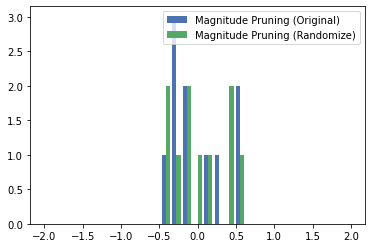

In [11]:

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = list(res1)
y = list(res2)
bins = np.linspace(-2, 2, 30)

plt.hist([x, y], bins, label=['Magnitude Pruning (Original)', 'Magnitude Pruning (Randomize)'])
plt.legend(loc='upper right')
plt.show()

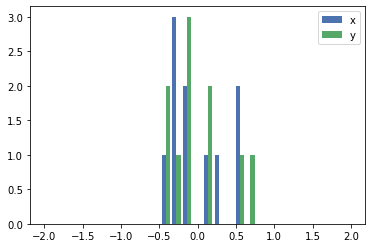

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = list(res1)
y = list(res3)
bins = np.linspace(-2, 2, 30)

plt.hist([x, y], bins, label=['x', 'y'])
plt.legend(loc='upper right')
plt.show()

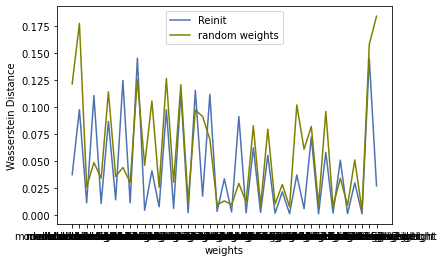

In [16]:

# layer_names = []
# randomize_weights = []
# reinit_weights = []
# random_weights = []

fig = plt.figure()
ax = plt.axes()
plt.xlabel("weights")
plt.ylabel("Wasserstein Distance")

ax.plot(layer_names, reinit_weights, label="Reinit");
# ax.plot(layer_names, randomize_weights, label="Layerwise Randomize");
ax.plot(layer_names, random_weights, color='olive', label="random weights");
plt.legend()

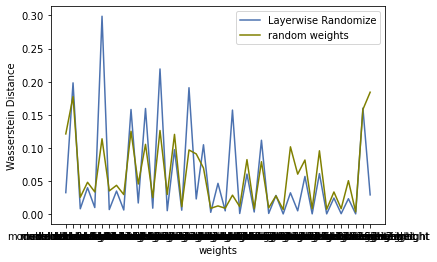

In [17]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel("weights")
plt.ylabel("Wasserstein Distance")

# ax.plot(layer_names, reinit_weights, label="Reinit");
ax.plot(layer_names, randomize_weights, label="Layerwise Randomize");
ax.plot(layer_names, random_weights, color='olive', label="random weights");
plt.legend()